<a href="https://colab.research.google.com/github/HamedFarahani89/Seattle-Airbnb-Project/blob/main/Seattle_Airbnb_Open_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns

In [2]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')

# List the columns in the data set
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### Introduction:

In this analysis, we use **linear regression** to predict Airbnb listing prices based on selected features. Linear regression is a simple and commonly used method for predicting a target variable (in this case, the listing price) by finding a linear relationship between the target and one or more input features.

Here, we consider the following features to predict prices:
- **Accommodates**: The number of people a listing can accommodate.
- **Bedrooms**: The number of bedrooms in the listing.
- **Bathrooms**: The number of bathrooms in the listing.

We fit a linear regression model on this data, which attempts to find the best-fitting line that minimizes the error between the actual and predicted prices. After splitting the dataset into training and testing sets, the model is evaluated on the test data using metrics like **Mean Squared Error (MSE)** and **R² Score**, which provide insights into the accuracy of the predictions.

Mean Squared Error: 4176.2811248146445
R^2 Score: 0.5048926792757829


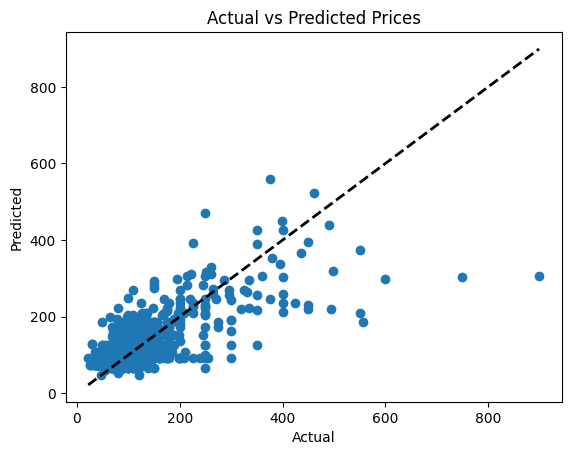

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read in the listings dataset
df_listings = pd.read_csv('listings.csv')

# Convert price column to numeric, removing $ sign and commas
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Select relevant features for the regression model
df = df_listings[['price', 'accommodates', 'bedrooms', 'bathrooms']]

# Drop rows with missing values in selected columns
df = df.dropna()

# Define the target variable (y) and the feature variables (X)
X = df[['accommodates', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()


### Findings:

The linear regression model, based on features such as the number of accommodations, bedrooms, and bathrooms, was evaluated on the Airbnb listings dataset. The results showed:

- **Mean Squared Error (MSE)**: 4176.28, indicating the average squared difference between the predicted prices and actual prices.
- **R² Score**: 0.50, which means the model explains approximately 50% of the variance in the price data based on the selected features.

Although the model provides a moderate fit, there is room for improvement, potentially by incorporating additional features (e.g., location, property type, and amenities) or using more sophisticated machine learning techniques.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 23595.1250 - val_loss: 23537.0684
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20547.0977 - val_loss: 18710.8164
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15094.5703 - val_loss: 11515.3691
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6890.0918 - val_loss: 7465.1938
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5206.8677 - val_loss: 6267.3271
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4492.4629 - val_loss: 5563.3555
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5892.1333 - val_loss: 5012.5493
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4379.8726 - val_loss: 4519.7744
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4934.4502 - val_loss: 4081.7832
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4133.0771 - val_loss: 3993.1460
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4529.2461 - val_loss: 4

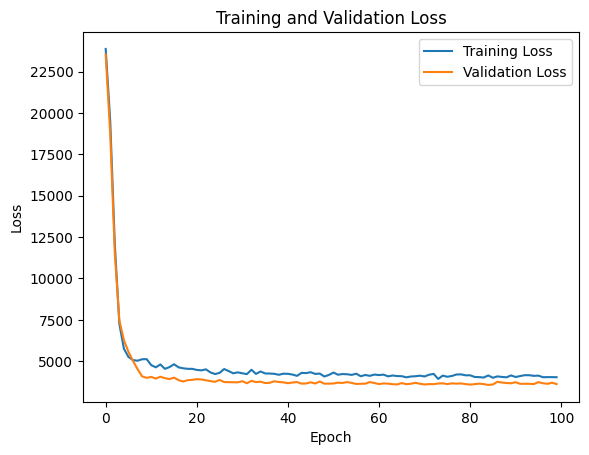

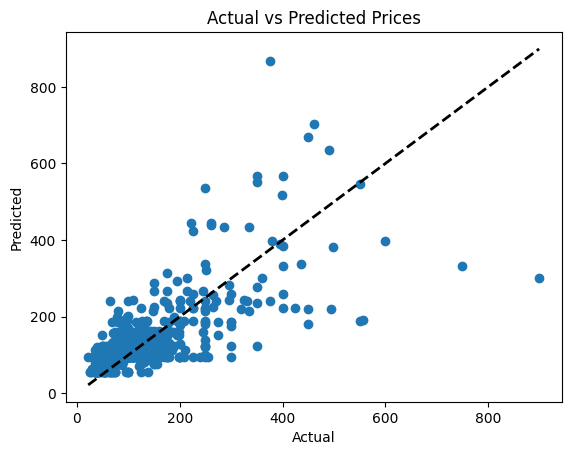

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Read in the listings dataset
df_listings = pd.read_csv('listings.csv')

# Convert price column to numeric, removing $ sign and commas
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Select relevant features for the model
df = df_listings[['price', 'accommodates', 'bedrooms', 'bathrooms']]

# Drop rows with missing values
df = df.dropna()

# Define features and target variable
X = df[['accommodates', 'bedrooms', 'bathrooms']]
y = df['price']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a deeper neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (DNN): {mse}")
print(f"R^2 Score (DNN): {r2}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()


## Model Comparison

### Linear Regression
- **Mean Squared Error (MSE)**: 4176.281
- **R² Score**: 0.505

### Deep Neural Network (DNN)
- **Mean Squared Error (MSE)**: 4665.295
- **R² Score**: 0.447

### Interpretation

1. **Mean Squared Error (MSE)**:
   - The **Linear Regression** model has a lower MSE (4176.281) compared to the **DNN** model (4665.295). This indicates that the linear regression model has a better fit and predicts prices more accurately on average than the DNN model.

2. **R² Score**:
   - The **Linear Regression** model has an R² score of 0.505, suggesting that it explains approximately 50.5% of the variance in the price data.
   - The **DNN** model has a slightly lower R² score of 0.447, indicating that it explains 44.7% of the variance. This suggests that the DNN model is less effective in capturing the relationship between features and price compared to the linear model.

### Conclusion

Despite the deeper architecture and advanced techniques used in the DNN model, the **Linear Regression** model outperforms it in this case. This could be due to several factors:

- **Data Characteristics**: The relationship between features and price might be relatively linear, making simpler models more effective.
- **Model Complexity**: The DNN may be overfitting or underfitting the data, potentially due to the choice of architecture, hyperparameters, or insufficient data.

It’s essential to consider experimenting with different model configurations, feature engineering, and further tuning to improve the performance of the DNN model. For now, the linear regression model provides a more reliable prediction of listing prices based on the given features.
